# АБ Тестирование
Для каждого бизнеса есть необходимость улучшать ключевые показатели.<br> Часто появляются идеи , как эти показатели улучшить(например из анализа рынка).<br>Идеи необходимо проверять:
* проверка на здравый смысл
* проверка на реальных пользователях
требования:
  * проверки должны быть достоверны(условия должны быть максимально приближены к реальным)
  * не очень дорогими
  
варианты:
  * опросы
  * фокус группы 
  
Проблема фокус группы состоит в том, что не всегда возможно воссоздать условия, близкие к настоящим.<br> Например, есть исследование о количество сахара в кока коле.Была собрана фокус группа , в которой предложили два напитка: один с обычным уровнем сахара, другой с увеличенным(больше сахара - вкуснее).Испытуемым понравился напиток с увеличенным уровнем сахара. Продукт выпустили на рынок и неожиданно продажи упали( оказалось, что людям, которые пьют кока колу в больших количествах сложнее это делать в более высоким уровнем сахара) .<br>

Альтернатива - **АБ тестинг**.<br>
Плюсы:
* условия  похожи на настоящие
* минимизация финансовых рисков (тк АБ тест применяется к ограниченной группе пользователей, заранее можно просчитать максимальные потери)

### где используется АБ Тестирование

В области IT:
* изменения дизайна
* изменение алгоритма
* введение новых функций



## Метрики
Например, деньги, аудиторные метрики.
Сложности: не всегда возможно корректно расчитать сразу, бывают достаточно грубыми или необходимо достаточно долго измерять.
Таким образом, переходим к идее **proxy**, или промежуточных метрик.<br>Это такие метрики,которые достаточно чувсвительные чтобы их измерять в рамках эксперимента или АБ тестинга ,и с другой строны хорошо согласуются с бизнес показателями, которые хотим в реальности измерять.Например, среднее к-во визитов в день,количество уникальных пользователей, etc.<br>
Таким образом, есть бизнес показатель, который нам интересен,и есть метрики, которые мы используем вместо него, тк не можем быстро померять деньги.
<br>оффлайн тестирование- проверить как изменяется поведение пользователей по историческим данным.Например , при ранжировании сайта в поисковой выдаче можно рассчитать такую метрику как средняя позиция клика и сравнить старый алгоритм ранжирования с новым по этой метрике.<br>
**резюме:иерархия метрик**
1. предварительные метрики, которые измеряем до начала эксперимента
1. экспериментальные метрики, по которым принимается решение о том, хорошее изменение или плохое
1. бизнес метрики, и мы надеемся, что наши изменения в итоге повлияют на них

## Дизайн эксперимента
нужна небольшая группа пользователей, которой мы предъявим новые изменения.Для того, чтобы результаты полученные на этой группе можно было обобщать на пользователей в целом, нужно чтобы эта группа была репрезентативной, то есть ее структура должна быть такой же , как в целом по всем пользователям.Например, есть $\frac{2}{3}$ пользователей нашего продукта женщины, в группе так же должно быть $\frac{2}{3}$  женщин.<br>
Таким образом , при построении группы мы должны выделять такие важные свойства пользователей, как пол, возраст,etc.И искусственно делать так, чтобы в группе сохранялись их доли. Такой подход называется **стратификацией**.<br>Другой подход, противоположный ему(в каком то смысле)- **рандомизация**.Если набирать в группу пользователей случайно,то в среднем, она получается такого же состава как и вся генеральная совокупность пользователей.Дополнительный плюс- группа выравнивается не только по определенным показателям,которые вам показались заранее и вы их выбрали но вообще по всем возможным.<br>
Иногда важно проверить как на пользователя влияют несколько изменений сразу.Такой дизайн называется **парным** или **связанным**,выборки, которые получаются , не независимые, а связанные.Это выгодно, когда измеряемые показатели имеют сильную индивидуальную дисперсию(то есть пользователи сильно отличаеются по измеряемому показателю).При связанном дизайне часто оказывается важным в каком порядке пользователю предъявлять варианы.Для того, чтобы снять влияние порядка, можно использовать дизайн **крест накрекст**.То есть $\frac{1}{2}$ пользователей показываете сначала старый дизайн, а потом новый, другой половине - наоборот.
## Устойчивость
-одно из **важнейших** требований, которые должны быть заложены при дизайне эксперимента.<br>
Под устойчивостью понимаем следующее:<br>
* не хотим видеть значимых изменений там,где их на самом деле нет
* если значимые изменения есть,хочется увидеть их на метриках
<br>
**Пример.**В эксперименте участвуют две одинаковые версии сервиса, например,в них нет никаких изменений.По всем метрикам мы ожидаем увидеть одинаковые результаты и наоборот.
<br>На практике это не всегда так.Например, если перекрасить кнопку поиска на сайте с синего на зеленый.И одной группе пользователей будем показывать один вариант, другой - другой.Подсчитаем метрику- количество нажатий на кнопку.Предположим, в контрольной группе число кликов стало больше.Действительно ли, новый дизайн кнопки лучше?Те пользователи , которые уже привыкли к сайту, могут удивиться и захотеть проверить из любопытства.Нужно убедиться, что метрики не учитывают это изменение как значимое.<br>
Вариант похитрее: выберем небольшую группу пользователей (1%) и будем продолжать показывать им старый дизайн после выкатки нового.То есть отдельно будет существовать группа пользователей,которая будет видеть старый дизайн существенное время.Это позволит считать метрики более длительное время, по истечении которого мы сможем сравнить поведение пользователей, которые видят старый дизайн с поведением пользователей,которые видят новый дизайн.В данном случае, если мы не увидим значимых измений,то мы сможем сделать вывод о том, что наш дизайн эксперимента не позволяет отличать значимые изменения от незначимых,с другой стороны - мы можем оставить дизайн, который нам больше нравится.Такая техника называется **обратным экспериментом**.<br>Ее идея состоит в том, что после классического АБ теста мы продолжаем проводить эксперимент, выделив небольшую группу пользователей,которые видят старое решение, что позволяет убедиться в том, что наши изменения значимы и приводят к нужным результатам.
<br>
Возникаем вопрос, можем ли мы заранее убедиться в том, что наш дизайн экперимента позволяем отличать значимые изменения от незначимых заранее(без обратного эксперимента).В частности, убедиться в том, что размер контрольных и целевых групп позволяем нам это делать и длительность эксперимента тоже подобрана правильно.Для того ,чтобы эту задачу решить , существует технология **АА** тестинга.Это работает следующим образом:
* Показываем один и тот же дизайн на обеих группах
* проверяем метрики на обеих группах.Если они совпадают- то все ок.

## Размер выборки
1. фиксируем критерий (например $z$ критерий или $t$ критерий
1. фиксируем тип альтернативы(двухсторонняя/одностронняя)
1. фиксируем вероятности ошибок I и II рода соотвественно (как правило 5% и 2%) и минимально интересующий размер эффекта
1. используем калькулятор мощности критериев для расчёта выборки

### Одновыборочные критерии Стьюдента
Позволяют проверять гипотезы о мат ожиданиях нормальных распределений.<br>
Пример: средний вес детей при рождении -3.3кг, у женщин, живущих за чертой бедности -2.8 кг.

25 женщин, живущих за чертой бедности, участвовали в экспериментальной программме ведения беременности.Средний вес их детей при рождении составил 3075 г, стандартное отклонение 500г.<br>
Эффективна ли программа?<br>
### $Z$ критерий
выборка $X^n=(X_1,...,X_n),X\sim N(\mu,\sigma^2)$ ,$\sigma$ известна<br>
нулевая гипотеза:$H_0:\mu=\mu_0$<br>
альтернатива:$H_1:\mu<\not=>\mu_0$ эту гипотезу можно проверять против разных альтернатив(односторонней и двухсторонней)<br> 
статистика:$Z(X^n)=\frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$ z - статистика<br>
нулевое распределение:$Z(X^n)\sim N(0,1)$<br>
Если нулевая гипотеза справедлива, то z статистика имеет стандартное нормальное распределение.<br>
#### Достигаемый уровень значимости 
При $H_1:\mu<\mu_0$<br>
$p=F_{N(0,1)}(z)$<br>
![pvalue](../img/z1.png)
При $H_1:\mu>\mu_0$<br>
$p=1-F_{N(0,1)}(z)$<br>
![pvalue](../img/z2.png)
При $H_1:\mu \not=\mu_0$<br>
$p=2(1-F_{N(0,1)}(|z|))$
![pvalue](../img/z3.png)
### $t$ -критерий
более общий случай, когда дисперсия не известна<br>
выборка $X^n=(X_1,...,X_n),X\sim N(\mu,\sigma^2)$ ,$\sigma$ не известна<br>
нулевая гипотеза:$H_0:\mu=\mu_0$<br>
альтернатива:$H_1:\mu<\not=>\mu_0$ <br> 
статистика:$T(X^n)=\frac{\bar{X}-\mu_0}{S/\sqrt{n}}$ S -выборочное среднее отклонение<br>
нулевое распределение:$T(X^n)\sim St(n-1)$<br>
$p=\left\{
                \begin{array}{ll}
                  F_{St(n-1)}(t),H_1:\mu<\mu_0\\
                  1-F_{St(n-1)}(t),H_1:\mu>\mu_0\\
                  2(1-F_{St(n-1)}(|t|)),H_1:\mu\not=\mu_0
                \end{array}
              \right.
  $<br>
  Чем больше объем выборки, тем меньше разницы между **t** и **Z** критериями.<br>
### вес детей при рождении
$H_0:$ программа неэффективна, $\mu=2800$<br>
$H_1:$ программа как то влияет на вес детей, $\mu \not=2800$<br>
t-критерий:$p=7.1*10^{-13}$,средний вес увеличивается на 275 г.(95% доверительный интервал)-[233.7,316.3]
### Двухвыборочные  критерии Стьюдента
Пример:В 1974 году 108 респондентов работали неполный день, в 2014-196.Для каждого известно количество рабочих часов за неделю, предшествующих опросу.<br>
Изменилось ли среднее время работы у работающих неполный день?
![pvalue](../img/boxplot.png)
**boxplot** или ящик с усами-способ визуализации основых характеристик распределения
![pvalue](../img/boxplot2.png)
### $z$ -критерий
выборки:<br>
$X^{n_1}_1=(X_11,...,X_{1n_1})$ <br>
$X^{n_1}_2=(X_21,...,X_{2n_1})$ <br>
$X_1\sim N(\mu_1,\sigma^2_1),X_2\sim N(\mu_2,\sigma^2_2),\sigma_1,\sigma_2 известны$ <br>
нулевая гипотеза:$H_0:\mu_1=\mu_2$<br>
альтернатива:$H_1:\mu_1<\not=>\mu_2$ <br> 

статистика:$Z(X^{n_1}_1,X^{n_2}_2)=\frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{\sigma^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}}$ z - статистика<br>
нулевое распределение:$Z(X^{n_1}_1,X^{n_2}_2)\sim N(0,1)$<br>
### $t$ -критерий
выборки:<br>
$X^{n_1}_1=(X_11,...,X_{1n_1})$ <br>
$X^{n_1}_2=(X_21,...,X_{2n_1})$ <br>
$X_1\sim N(\mu_1,\sigma^2_1),X_2\sim N(\mu_2,\sigma^2_2),\sigma_1,\sigma_2 неизвестны$ <br>
нулевая гипотеза:$H_0:\mu_1=\mu_2$<br>
альтернатива:$H_1:\mu_1<\not=>\mu_2$ <br> 

статистика:$T(X^{n_1}_1,X^{n_2}_2)=\frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{S^2_1}{n_1}+\frac{S^2_2}{n_2}}}$ <br>
нулевое распределение:$T(X^{n_1}_1,X^{n_2}_2) \approx\sim St(v)$<br>
число степень свободы v рассчитывается по следующей формуле:<br>
$v=\frac{(\frac{S^2_1}{n_1}+\frac{S^2_2}{n_2})^2}{\frac{S^4_1}{n^2_1(n_1-1)}+\frac{S^4_2}{n^2_2(n_2-1)}}$<br>
Проблемы:
* формула достаточно сложна
* проблема Беренца-Фишера (нулевое распределение приближенное, а не точное, точно решения не существует)<br>
**Подход**
Приближение достаточно точно, при $n_1=n_2$ или $[n_1>n_2]=[\sigma_1>\sigma_2]$<br>
**Подход справедлив не только для t - критерия.Сравнивая значения в 2х выборках надо следить за тем, что
у выборки , у которой диспепсия больше,объем не меньше**<br>
вернёмся к задаче:<br>
$H_0:$ среднее время работы не изменилось, $\mu_1=\mu_2$<br>
$H_1:$ программа как то влияет на вес детей, $\mu_1\not=\mu_2$<br>
t-критерий:$p=0.02707$,средняя продолжительность рабочей недели увеличилась на 2.57 часов г.(95% доверительный интервал)-[0.29,4.85]
### Двухвыборочные  критерии Стьюдента,связанные выборки
задача: 24 ребёнка прошли тест на способность к подавлению импульсивных поведенческих реакций после недели приёма метилфенидата и после недели приёма плацебо.
![pvalue](../img/qq.png)
Каждая точка соответсвует одному ребенку.
Значимо ли это изменение?

выборки:<br>
$X^{n_1}_1=(X_11,...,X_{1n_1})$ <br>
$X^{n_1}_2=(X_21,...,X_{2n_1})$ <br>
$X_1\sim N(\mu_1,\sigma^2_1),X_2\sim N(\mu_2,\sigma^2_2),\sigma_1,\sigma_2 неизвестны$ <br>
нулевая гипотеза:$H_0:\mu_1=\mu_2$<br>
альтернатива:$H_1:\mu_1<\not=>\mu_2$ <br> 

статистика:$T(X^{n_1}_1,X^{n_2}_2)=\frac{\bar{X_1}-\bar{X_2}}{S/\sqrt{n}}$ <br>
$$S^2=\frac{1}{n-1}\sum^n_{i=1}(D_i-\bar{D})^2,D_i=X_{1i}-X_{2i})$$ выборка D- выборка попарных разностей<br>
нулевое распределение:$T(X^{n_1}_1,X^{n_2}_2) \sim St(n-1)$<br>

Таким образом, двухборочный t критерий эквивалентен одновыборочному для парных разностей.<br>
### Нормальность выборок
Критерии Стьюдента проверяют гипотезы о средних значениях выборок в предположении , что эти выборки взяты из нормального распределения.<br>
Инструмент проверки нормальности-**критерий согласия Пирсона** или критерий **хи-квадрат**.
<br>
выборка:$X^{n}_1=(X_1,...,X_{n})$ <br>
нулевая гипотеза:$H_0:X \sim N(\mu,\theta^2)$<br>
альтернатива:$H_1:H_0$ неверна<br> 
статистика:$\chi^2(X^n)=\sum^K_{i=1}(\frac{n_i-np_i}{np_i})$<br>
Мы разбиваем область изменения случайной величины на $K$ интервалов ,$n_i$-число элеменотов выборки, которое попало в интервал,$p_i$ теоретическая вероятность попадания в этот интервал при условии справедливости нулевой гипотезы.<br>
нулевое распределение:$\chi^2(X^n) \sim\left\{
                \begin{array}{ll}
                  \chi^2_{K-1},\mu,\theta \, заданы \\
                  \chi^2_{K-3},\mu,\theta\, оцениваются
                \end{array}
              \right.
  $<br>
  $n_i$- число элементов выборки в $[\alpha_i,\alpha_{i+1}]$<br>
   $p_i=F_{N(\mu,\theta^2)}(\alpha_i+1)-_{N(\mu,\theta^2)}(\alpha_i)$<br>
   
 **недостатки:**
 * разбиение на интервалы неоднозначно
 * Требует больших выборок($np_i>5$ в 80% интервалов)

### Q -Q PLOT
Визуальный метод проверки согласия выборки и распределения
![qqplot](../img/qqplot.png)
Для того, чтобы построить такой график, выборка сортируется по неубыванию.
Значение по вертикальной оси соответсвует X, по горизонтали- матожиданию квантиля стандартного нормального распределения рассчитанного по выборке такого объема
#### Критерий Шапиро-Уилка 
выборка:$X^{n}_1=(X_1,...,X_{n})$ <br>
нулевая гипотеза:$H_0:X \sim N(\mu,\theta^2)$<br>
альтернатива:$H_1:H_0$ неверна<br> 
статистика:$W(X^n)=\frac{(\sum^n_{i=1}\alpha_i X_{(i)})^2}{\sum^n_{i=1}(X_i-\bar{X})^2}$<br>
$\alpha_i$ основаны на матожиданиях порядковых статистик нормального распределения и также табулированы<br>
критерий проверяет , сильно ли точки на ку-ку графике отклоняются от прямой
### Зачем проверять нормальность?
* на маленьких выборках нормальность , скорее всего, не отвергается
* на больших выборках нормальность, скорее всего, отвергается
* многие методы нечувствительны к отклонениям от нормальности(например, критерии Стьюдента)

### Алгоритм
* если данные явно ненормальны(например бинарны или дискретны), нужно выборать метод специфичный для такого распределения
* Если на ку-ку графике не видно существенных отклонений от нормальности, можно сразу использовать методы, устойчивые к небольшим отклонениям(например, критерии Стьюдента)
* Если метод чувствителен к отклонениям от нормальности, проверять ее рекомендуется критерием Шапиро-Уилка

In [1]:
import numpy as np
import pandas as pd
import scipy
from statsmodels.stats.weightstats import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Treatment effects of methylphenidate
В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

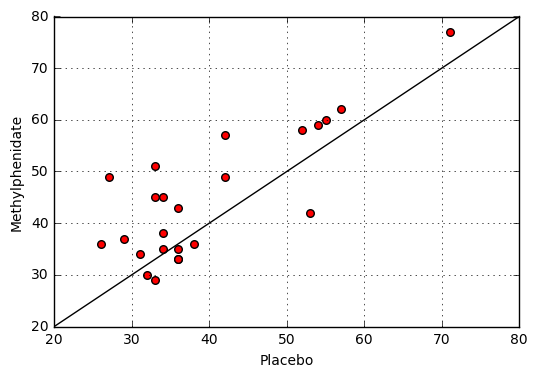

In [2]:
data = pd.read_csv(r'../data/ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

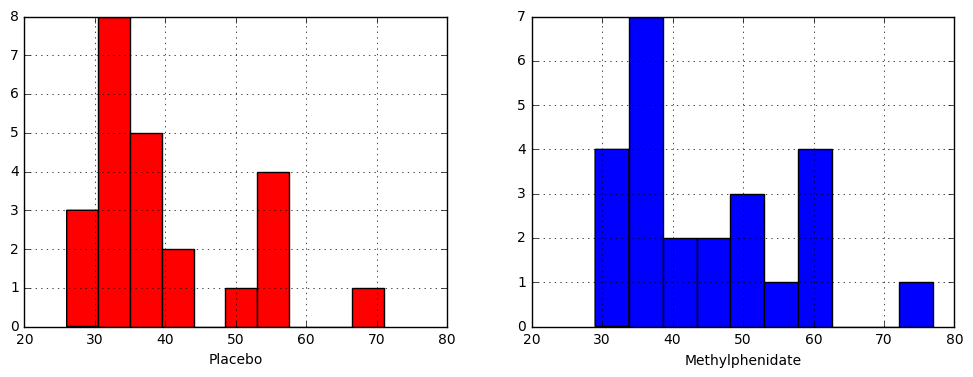

In [3]:
pylab.figure(figsize=(12,4))
pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(data.Placebo,color='r')
pylab.xlabel('Placebo')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(data.Methylphenidate,color='b')
pylab.xlabel('Methylphenidate');

## Одновыборочный критерий Стьюдента
Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). <br>

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.<br>
$H_1\colon$ не равно.

In [4]:
stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.4380033419051284, pvalue=0.00018894293251080175)

уверенно отвергаем нулевую гипотезу

In [5]:
"95%% confidence interval: [%f, %f]" % zconfint(data.Placebo)

'95% confidence interval: [35.223273, 44.276727]'

видим, что наш интервал целиком лежит левее 50

## Двухвыборочный критерий Стьюдента (независимые выборки)
Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

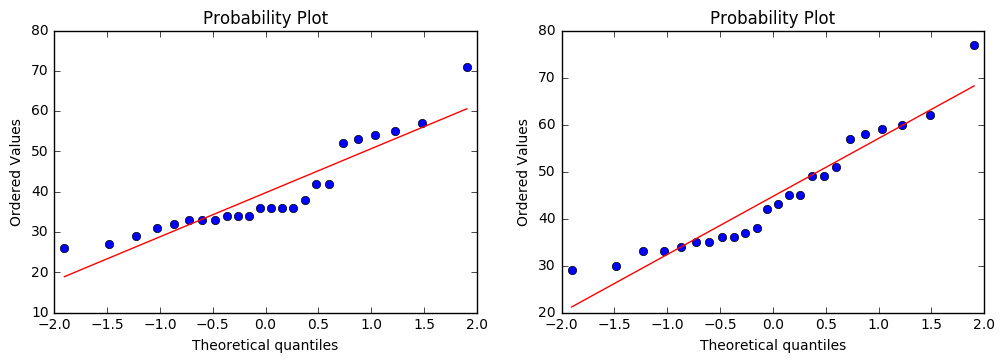

In [6]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

видим, что данные сильно не отличаются от нормального, для того, чтобы проверить это более строго, воспользуемя критерием Шапиро-Уилка.<br>
Критерий Шапиро-Уилка:

 $H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально<br>
 $H_1\colon$ не нормально.

In [7]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Placebo))
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate))

Shapiro-Wilk normality test, W-statistic: 0.857487, p-value: 0.003020
Shapiro-Wilk normality test, W-statistic: 0.916445, p-value: 0.048768


Отвергаем гипотезу о нормальности, однако по qq графику видим, что данные не сильно отличаются от нормального распределения и воспользуемся критерием Стьюдента.<br>

С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок.<br>
Критерий Стьюдента:<br>
$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.<br>
$H_0\colon$ не одинаковы.

In [8]:
#ind -independed -независимые выборки,equal_var = False тк нет данных о равенстве дисперсий
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.15329199774047089)

Таким образом, не можем отвергнуть нулевую гипотезу

In [9]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print ("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-1.915927, 11.832593]


наше среднее скорее всего больше чем 0, но 0 лежит в этом интервале
## Двухвыборочный критерий Стьюдента (зависимые выборки)
Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

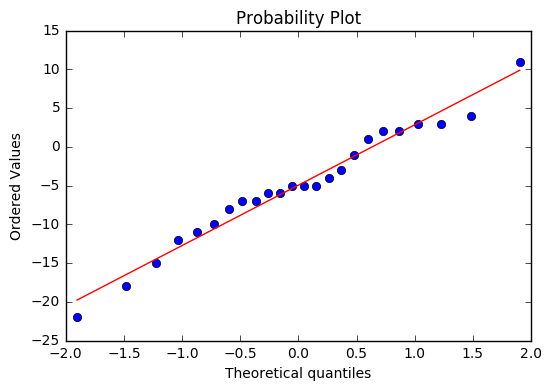

In [10]:
stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

Критерий Шапиро-Уилка:<br>

$H_0\colon$ попарные разности распределены нормально.<br>
$H_1\colon$ не нормально

In [11]:
"Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate - data.Placebo)

'Shapiro-Wilk normality test, W-statistic: 0.979806, p-value: 0.892254'

Нулевую гипотезу  о нормальности данных не отвергаем.<br>
Критерий Стьюдента:<br>

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.<br>

$H_1\colon$ не одинаковы.

In [12]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

нулевую гипотезу уверенно отвергаем

In [13]:
"95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean()

'95% confidence interval: [1.775236, 8.141431]'